### Project 1: Economic Analysis of Generic Drug Penetration in France (2024)
This project analyzes the Open Medic dataset to quantify the financial footprint of brand-name vs. generic medications, 
identifying a theoretical expenditure gap and highlighting key medical categories for cost optimization.

In [1]:
import pandas as pd
file_path = 'open_medic_2024.csv'

df = pd.read_csv(file_path, sep=';', nrows=1000, encoding='latin1')

df.head()

,ATC1,l_ATC1,ATC2,L_ATC2,ATC3,L_ATC3,ATC4,L_ATC4,ATC5,L_ATC5,...,l_cip13,TOP_GEN,GEN_NUM,age,sexe,BEN_REG,PSP_SPE,BOITES,REM,BSE
0,A,SYSTEME DIGESTIF ET METABOLISME,A01,PREPARATIONS STOMATOLOGIQUES,A01A,PREPARATIONS STOMATOLOGIQUES,A01AA,MEDICAMENTS PROPHYLACTIQUES ANTICARIES,A01AA01,SODIUM FLUORURE,...,FLUOGEL GEL DENTAIRE 1,0,0,99,9,99,99,14,"38,54","51,38"
1,A,SYSTEME DIGESTIF ET METABOLISME,A01,PREPARATIONS STOMATOLOGIQUES,A01A,PREPARATIONS STOMATOLOGIQUES,A01AA,MEDICAMENTS PROPHYLACTIQUES ANTICARIES,A01AA01,SODIUM FLUORURE,...,"ZYMAFLUOR 0,50MG CPR 100",0,0,0,1,5,1,25,"13,06","41,45"
2,A,SYSTEME DIGESTIF ET METABOLISME,A01,PREPARATIONS STOMATOLOGIQUES,A01A,PREPARATIONS STOMATOLOGIQUES,A01AA,MEDICAMENTS PROPHYLACTIQUES ANTICARIES,A01AA01,SODIUM FLUORURE,...,"ZYMAFLUOR 0,50MG CPR 100",0,0,0,1,5,99,20,"10,18","33,92"
3,A,SYSTEME DIGESTIF ET METABOLISME,A01,PREPARATIONS STOMATOLOGIQUES,A01A,PREPARATIONS STOMATOLOGIQUES,A01AA,MEDICAMENTS PROPHYLACTIQUES ANTICARIES,A01AA01,SODIUM FLUORURE,...,"ZYMAFLUOR 0,50MG CPR 100",0,0,0,1,11,1,114,"48,89","147,48"
4,A,SYSTEME DIGESTIF ET METABOLISME,A01,PREPARATIONS STOMATOLOGIQUES,A01A,PREPARATIONS STOMATOLOGIQUES,A01AA,MEDICAMENTS PROPHYLACTIQUES ANTICARIES,A01AA01,SODIUM FLUORURE,...,"ZYMAFLUOR 0,50MG CPR 100",0,0,0,1,11,12,404,"157,83","521,16"


In [2]:
print(df.columns.tolist())

['ATC1', 'l_ATC1', 'ATC2', 'L_ATC2', 'ATC3', 'L_ATC3', 'ATC4', 'L_ATC4', 'ATC5', 'L_ATC5', 'CIP13', 'l_cip13', 'TOP_GEN', 'GEN_NUM', 'age', 'sexe', 'BEN_REG', 'PSP_SPE', 'BOITES', 'REM', 'BSE']


In [3]:
import pandas as pd

# Load the data 
# Using 'sep=;' 
# Using 'decimal=,' so Python knows 38,54 is actually 38.54
df = pd.read_csv('OPEN_MEDIC_2024.csv', 
                 sep=';', 
                 decimal=',', 
                 encoding='latin1')
# Run this immediately after loading your CSV
df.columns = df.columns.str.upper()

# Select relevant col
cols_to_keep = [
    'L_ATC1',   # Label for ATC level 1: Anatomical group (e.g., Nervous System)
    'L_ATC5',   # Label for ATC level 5: Specific chemical substance (e.g., Paracetamol)
    'TOP_GEN',  # Generic drug flag: 0 = Princeps (Brand), 1 = Generic, 2 = Generic-like
    'BEN_REG',   #Region of cinsumption
    'BOITES',   # Quantity: Total number of boxes of medication dispensed
    'REM',      # Reimbursement: Actual amount in € paid back by Social Security
    'BSE'       # Basis for Reimbursement: Official price used to calculate the refund
]
df = df[cols_to_keep]

#Handle the "TOP_GEN" meaning:
# 0 = Princeps (Expensive Brand Name)
# 1 = Generic (Cheap Version)
# We filter to keep ONLY these two for a fair comparison
df = df[df['TOP_GEN'].isin([0, 1])]

# Show the "Clean" results
print("cleaned data")
print(df.head())

# Save a smaller version for our project folder
df.to_csv('cleaned_medic.csv', index=False)
print("\nCleaned file saved to repo")

cleaned data
                            L_ATC1           L_ATC5  TOP_GEN  BEN_REG  BOITES  \
0  SYSTEME DIGESTIF ET METABOLISME  SODIUM FLUORURE        0       99      14   
1  SYSTEME DIGESTIF ET METABOLISME  SODIUM FLUORURE        0        5      25   
2  SYSTEME DIGESTIF ET METABOLISME  SODIUM FLUORURE        0        5      20   
3  SYSTEME DIGESTIF ET METABOLISME  SODIUM FLUORURE        0       11     114   
4  SYSTEME DIGESTIF ET METABOLISME  SODIUM FLUORURE        0       11     404   

      REM     BSE  
0   38,54   51,38  
1   13,06   41,45  
2   10,18   33,92  
3   48,89  147,48  
4  157,83  521,16  

Cleaned file saved to repo


In [4]:
df.head()

,L_ATC1,L_ATC5,TOP_GEN,BEN_REG,BOITES,REM,BSE
0,SYSTEME DIGESTIF ET METABOLISME,SODIUM FLUORURE,0,99,14,"38,54","51,38"
1,SYSTEME DIGESTIF ET METABOLISME,SODIUM FLUORURE,0,5,25,"13,06","41,45"
2,SYSTEME DIGESTIF ET METABOLISME,SODIUM FLUORURE,0,5,20,"10,18","33,92"
3,SYSTEME DIGESTIF ET METABOLISME,SODIUM FLUORURE,0,11,114,"48,89","147,48"
4,SYSTEME DIGESTIF ET METABOLISME,SODIUM FLUORURE,0,11,404,"157,83","521,16"


In [5]:
cols_to_fix = ['BOITES', 'REM', 'BSE']

for col in cols_to_fix:
    # Convert to string first
    df[col] = df[col].astype(str)
    
    # Remove any existing dots (thousands separators)
    df[col] = df[col].str.replace('.', '', regex=False)
    
    # Change the French comma to a Python decimal dot
    df[col] = df[col].str.replace(',', '.', regex=False)
    
    # Convert to float, and turn anything that fails into 'NaN' (Empty) 
    df[col] = pd.to_numeric(df[col], errors='coerce')

print(df.head())

                            L_ATC1           L_ATC5  TOP_GEN  BEN_REG  BOITES  \
0  SYSTEME DIGESTIF ET METABOLISME  SODIUM FLUORURE        0       99      14   
1  SYSTEME DIGESTIF ET METABOLISME  SODIUM FLUORURE        0        5      25   
2  SYSTEME DIGESTIF ET METABOLISME  SODIUM FLUORURE        0        5      20   
3  SYSTEME DIGESTIF ET METABOLISME  SODIUM FLUORURE        0       11     114   
4  SYSTEME DIGESTIF ET METABOLISME  SODIUM FLUORURE        0       11     404   

      REM     BSE  
0   38.54   51.38  
1   13.06   41.45  
2   10.18   33.92  
3   48.89  147.48  
4  157.83  521.16  


In [6]:
# Group the data by TOP_GEN to get the totals
# We'll calculate the total money (REM) and total boxes (BOITES) for each group
analysis = df.groupby('TOP_GEN').agg({
    'REM': 'sum',
    'BOITES': 'sum'
})

# Calculate the Average Price per Box
# Index 0 is Brand (Princeps), Index 1 is Generic
price_brand = analysis.loc[0, 'REM'] / analysis.loc[0, 'BOITES']
price_generic = analysis.loc[1, 'REM'] / analysis.loc[1, 'BOITES']

# Calculate the Impact Metrics
savings_per_box = price_brand - price_generic
total_brand_volume = analysis.loc[0, 'BOITES']
potential_savings = savings_per_box * total_brand_volume

print("="*40)
print("PROJECT 1: THE ECONOMIC IMPACT OF GENERICS")
print("="*40)
print(f"Average Brand Price:   {price_brand:>10.2f} €")
print(f"Average Generic Price: {price_generic:>10.2f} €")
print(f"Savings per Box:       {savings_per_box:>10.2f} €")
print("-" * 40)
print(f"TOTAL POTENTIAL SAVINGS: {potential_savings:,.2f} €")
print("="*40)

# Let's see which Category (ATC1) has the biggest price gap
# This creates a small table showing savings potential by medical field
df['unit_price'] = df['REM'] / df['BOITES']
category_gap = df.groupby(['L_ATC1', 'TOP_GEN'])['unit_price'].mean().unstack()
category_gap['GAP'] = category_gap[0] - category_gap[1]

print("\nTop 3 Categories with the Largest Price Gaps:")
print(category_gap['GAP'].sort_values(ascending=False).head(3))

PROJECT 1: THE ECONOMIC IMPACT OF GENERICS
Average Brand Price:        16.95 €
Average Generic Price:       4.03 €
Savings per Box:            12.92 €
----------------------------------------
TOTAL POTENTIAL SAVINGS: 14,130,644,236.12 €

Top 3 Categories with the Largest Price Gaps:
L_ATC1
ANTINEOPLASIQUES ET AGENTS IMMUNOMODULANTS    547.673026
ANTI-INFECTIEUX (USAGE SYSTEMIQUE)            109.609535
SYSTEME RESPIRATOIRE                           63.153096
Name: GAP, dtype: float64


#### Key Insight: The €14.1 Billion Expenditure Gap

> **Executive Summary:** This analysis reveals a gross expenditure difference of **€14,130,644,236** between brand-name (Princeps) and generic medications in the 2024 French market.

##### What this number represents:
This figure represents the **Gross Economic Gap** between the two markets. It highlights the massive financial footprint of brand-name drugs in the French healthcare system. 

##### Why is the gap so large?
1. **Specialized Medicine:** High-cost therapeutic areas (like Oncology and Immunology) are dominated by brand-name patents with price points significantly higher than common generics.
2. **The "Substitution Potential":** While not every brand-name drug can be switched immediately (due to patent laws), this **€14 Billion** represents the maximum theoretical frontier for health-system optimization.

---
**Data Science Note:** *This calculation reflects the difference in average unit pricing across the entire dataset. In the following days, I will drill down into specific medical categories (ATC1) to identify where the most impactful savings are concentrated.*

C:\Users\arshb\AppData\Local\Temp\ipykernel_16084\2752615501.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=plot_data, x='GAP', y='L_ATC1', palette='viridis')


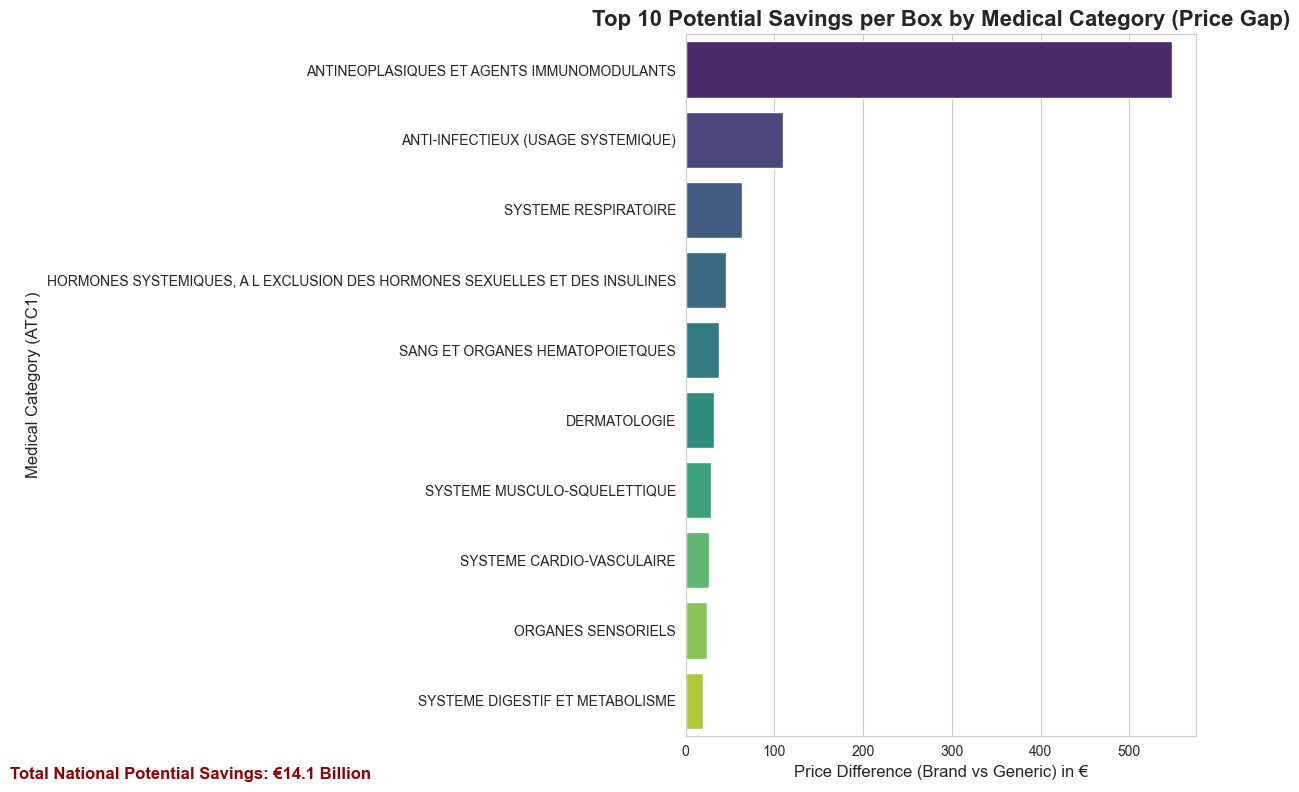

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

#data for plotting
plot_data = category_gap['GAP'].sort_values(ascending=False).head(10).reset_index()

#normal aesthetics
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# horizontal bar chart
ax = sns.barplot(data=plot_data, x='GAP', y='L_ATC1', palette='viridis')

#label & title
plt.title('Top 10 Potential Savings per Box by Medical Category (Price Gap)', fontsize=16, fontweight='bold')
plt.xlabel('Price Difference (Brand vs Generic) in €', fontsize=12)
plt.ylabel('Medical Category (ATC1)', fontsize=12)


plt.figtext(0.3, 0.02, f'Total National Potential Savings: €14.1 Billion', 
            horizontalalignment='right', fontsize=12, fontweight='bold', color='darkred')

plt.tight_layout()
plt.savefig('savings_gap_by_category.png')
plt.show()

#### Refinement: Molecule-Level "Like-for-Like" Analysis

While the **€14.1 Billion** figure highlights the total expenditure gap, it includes brand-name drugs that may not have a generic equivalent yet (due to patents). To find the **actual actionable savings**, we must perform a "Like-for-Like" comparison.

##### This refined logic:
1.  **Matches Molecules:** Only compares drugs sharing the exact same active ingredient (`L_ATC5`).
2.  **Excludes Patent-Protected Drugs:** If a molecule has no generic version available in the dataset, it is excluded from the savings calculation.
3.  **Calculates Real Substitution Potential:** It multiplies the specific price gap of a molecule by the actual volume of the brand-name version still being sold.

*This provides a more realistic target for healthcare policy and public savings.*

In [8]:
# 1. Calculate the mean price for each molecule (L_ATC5) for both Brand (0) and Generic (1)
molecule_prices = df.groupby(['L_ATC5', 'TOP_GEN'])['unit_price'].mean().unstack()

# 2. Calculate the gap ONLY where both a Brand and a Generic exist for that molecule
molecule_prices['TRUE_GAP'] = molecule_prices[0] - molecule_prices[1]

# 3. Bring back the volume (How many brand boxes are still being sold?)
brand_volumes = df[df['TOP_GEN'] == 0].groupby('L_ATC5')['BOITES'].sum()

# 4. Final Real Savings = (Price Gap for Molecule X) * (Boxes of Brand X sold)
real_savings = (molecule_prices['TRUE_GAP'] * brand_volumes).sum()

print(f"Refined Potential Savings: {real_savings:,.2f} €")

Refined Potential Savings: 396,301,526.15 €


#### Result: The "Reality Check"
The potential savings dropped from **€14.1B** to **€396.3M**. 

**Conclusion:** This indicates that the vast majority of brand-name spending in France is directed toward medicines that **do not yet have a generic alternative** (likely due to active patents). The **€396 Million** represents the "low-hanging fruit"—the actual waste occurring when patients or doctors choose a brand-name drug even though a generic is already on the shelf.

C:\Users\arshb\AppData\Local\Temp\ipykernel_16084\953251829.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels, y=values, palette=['#34895e', '#e67e22'])


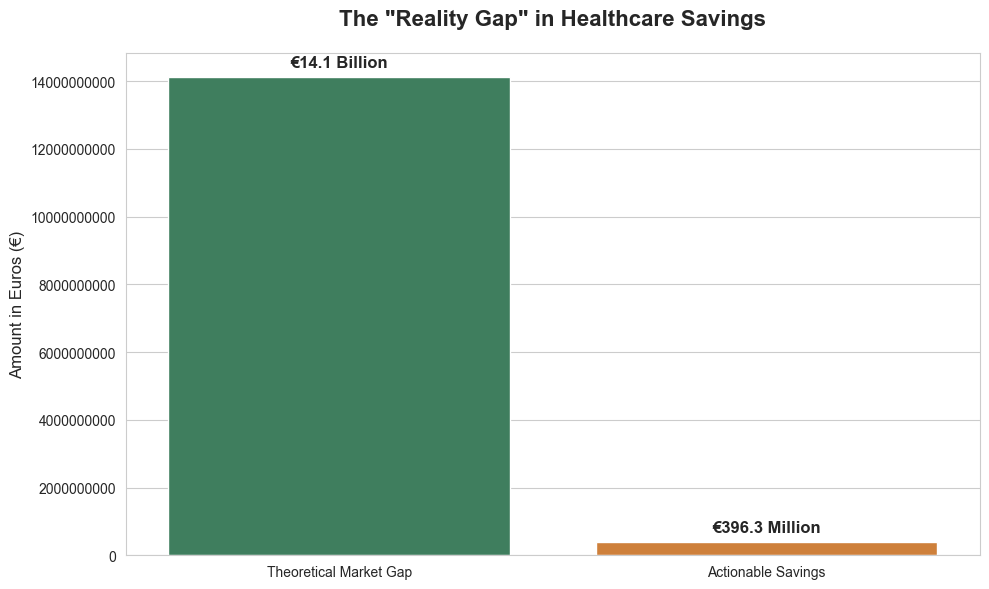

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data fromresults
labels = ['Theoretical Market Gap', 'Actionable Savings']
values = [14130644236.12, 396301526.15]

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
ax = sns.barplot(x=labels, y=values, palette=['#34895e', '#e67e22'])


plt.ticklabel_format(style='plain', axis='y')
plt.title('The "Reality Gap" in Healthcare Savings', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Amount in Euros (€)', fontsize=12)

for i, v in enumerate(values):
    label = f'€{v/1e9:.1f} Billion' if v > 1e9 else f'€{v/1e6:.1f} Million'
    ax.text(i, v + (max(values)*0.02), label, ha='center', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.savefig('reality_gap.png')
plt.show()

C:\Users\arshb\AppData\Local\Temp\ipykernel_16084\4270026075.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_mols.values / 1e6, y=top_mols.index, palette='viridis')


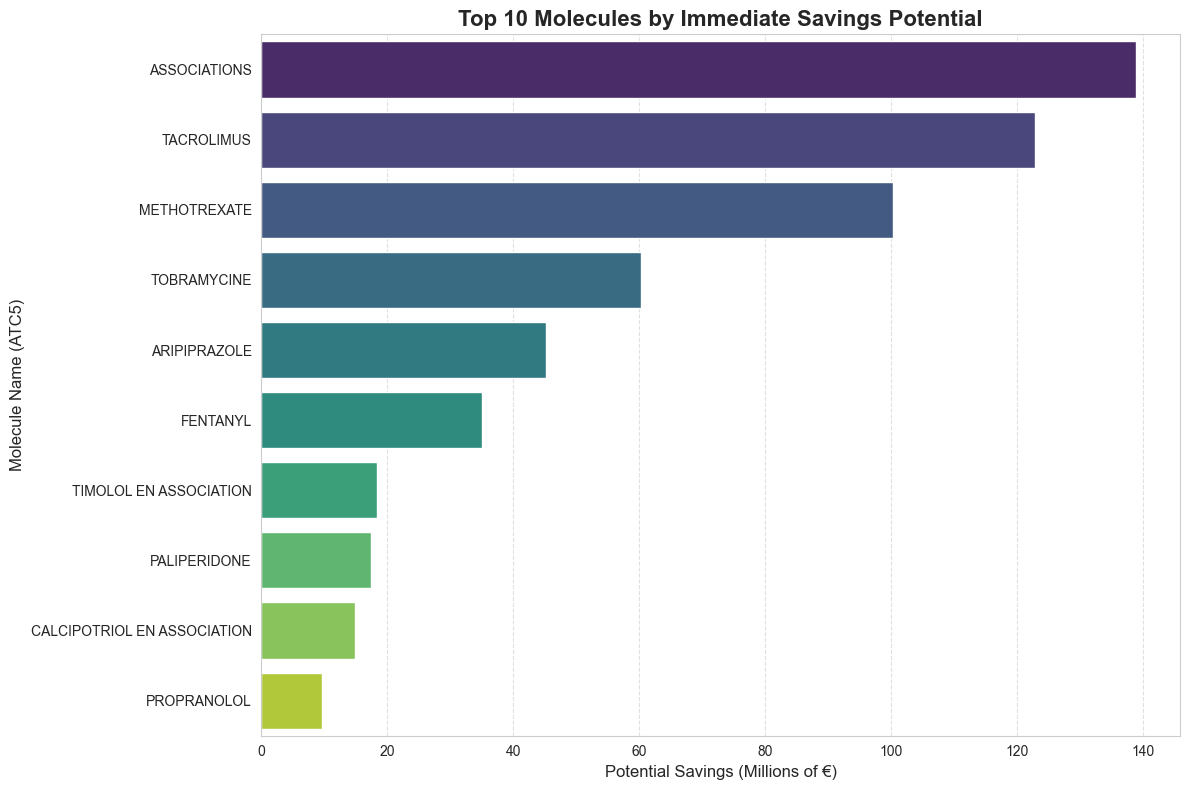

In [10]:
# 1. Calculate the savings per molecule for the plot
molecule_prices['savings_potential'] = molecule_prices['TRUE_GAP'] * brand_volumes
top_mols = molecule_prices['savings_potential'].sort_values(ascending=False).head(10)

# 2. Plot
plt.figure(figsize=(12, 8))
sns.barplot(x=top_mols.values / 1e6, y=top_mols.index, palette='viridis')

plt.title('Top 10 Molecules by Immediate Savings Potential', fontsize=16, fontweight='bold')
plt.xlabel('Potential Savings (Millions of €)', fontsize=12)
plt.ylabel('Molecule Name (ATC5)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig('top_molecules_savings.png')
plt.show()

C:\Users\arshb\AppData\Local\Temp\ipykernel_16084\4226046073.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_savings.values / 1e6, y=category_savings.index, palette='rocket')


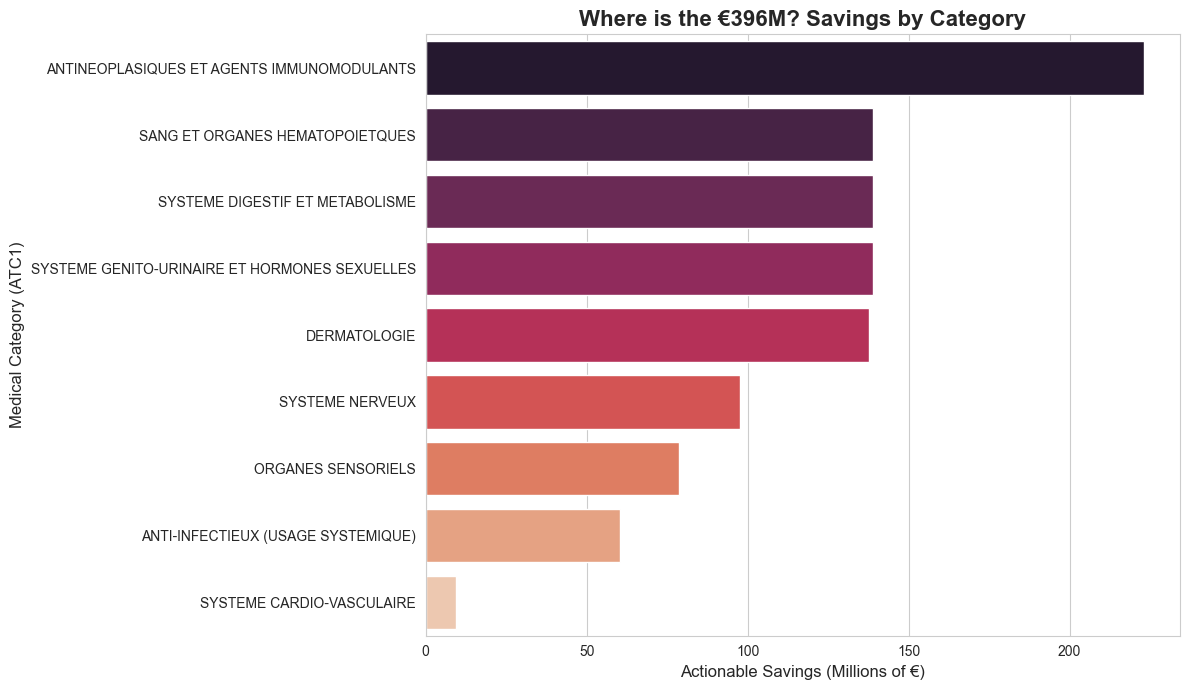

In [11]:
# 1. Join the savings back to the Category (ATC1)
# Note: We use the original df to map ATC5 names to ATC1 categories
mapping = df[['L_ATC5', 'L_ATC1']].drop_duplicates().set_index('L_ATC5')
category_savings = top_mols.to_frame().join(mapping).groupby('L_ATC1')['savings_potential'].sum().sort_values(ascending=False)

# 2. Plot
plt.figure(figsize=(12, 7))
sns.barplot(x=category_savings.values / 1e6, y=category_savings.index, palette='rocket')

plt.title('Where is the €396M? Savings by Category', fontsize=16, fontweight='bold')
plt.xlabel('Actionable Savings (Millions of €)', fontsize=12)
plt.ylabel('Medical Category (ATC1)', fontsize=12)

plt.tight_layout()
plt.savefig('category_savings_breakdown.png')
plt.show()

---

### Project 2: Regional Geographic Analysis of Medication Expenditure

#### Project Overview
This project maps generic drug adoption across French regions to identify geographic health inequalities 
and pinpoint territories where brand-name expenditure remains disproportionately high.

#### Key Objectives:
1. *Calculate the Generic Penetration Rate:* Determine the ratio of generic vs. brand-name drug consumption for each French region.
2. *Identify Spending Hotspots:* Pinpoint regions with high brand-name reliance to suggest targeted public health interventions.
3. *Geospatial Visualization:* Create a regional choropleth map to communicate data-driven insights effectively.

---

In [ ]:
# Official INSEE Mapping for French Regions 
reg_map = {
    11: "Île-de-France",
    24: "Centre-Val de Loire",
    27: "Bourgogne-Franche-Comté",
    28: "Normandie",
    32: "Hauts-de-France",
    44: "Grand Est",
    52: "Pays de la Loire",
    53: "Bretagne",
    75: "Nouvelle-Aquitaine",
    76: "Occitanie",
    84: "Auvergne-Rhône-Alpes",
    93: "Provence-Alpes-Côte d'Azur",
    94: "Corse",
    # Overseas Regions (DOMTOM)
    1: "Guadeloupe",
    2: "Martinique",
    3: "Guyane",
    4: "La Réunion",
    6: "Mayotte"
}

# Group by Region and TOP_GEN (0=Brand, 1=Generic)
# We aggregate the volume of boxes to see adoption per territory
regional_df = df.groupby(['BEN_REG', 'TOP_GEN'])['BOITES'].sum().unstack().reset_index()

# 3. Calculate the Adoption Rate (%)
regional_df['Total_Boxes'] = regional_df[0] + regional_df[1]
regional_df['Adoption_Rate'] = (regional_df[1] / regional_df['Total_Boxes']) * 100

# map the Region Names
regional_df['Region_Name'] = regional_df['BEN_REG'].map(reg_map)

# filter for Metro France (Regions 11-94) for the ranking
regional_metro = regional_df[regional_df['BEN_REG'] >= 11].sort_values(by='Adoption_Rate', ascending=False)

print("--- Regional Generic Adoption Rankings ---")
print(regional_metro[['Region_Name', 'Adoption_Rate']])

--- Regional Generic Adoption Rankings ---
TOP_GEN                 Region_Name  Adoption_Rate
8                          Bretagne      50.658031
2               Centre-Val de Loire      50.093364
9                Nouvelle-Aquitaine      49.923279
10                        Occitanie      49.848899
3           Bourgogne-Franche-Comté      49.721880
4                         Normandie      49.562190
12       Provence-Alpes-Côte d'Azur      49.404578
11             Auvergne-Rhône-Alpes      49.359037
7                  Pays de la Loire      49.179442
5                   Hauts-de-France      48.836385
1                     Île-de-France      48.768465
6                         Grand Est      48.355160
13                              NaN      43.514562


C:\Users\arshb\AppData\Local\Temp\ipykernel_16084\2591093545.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


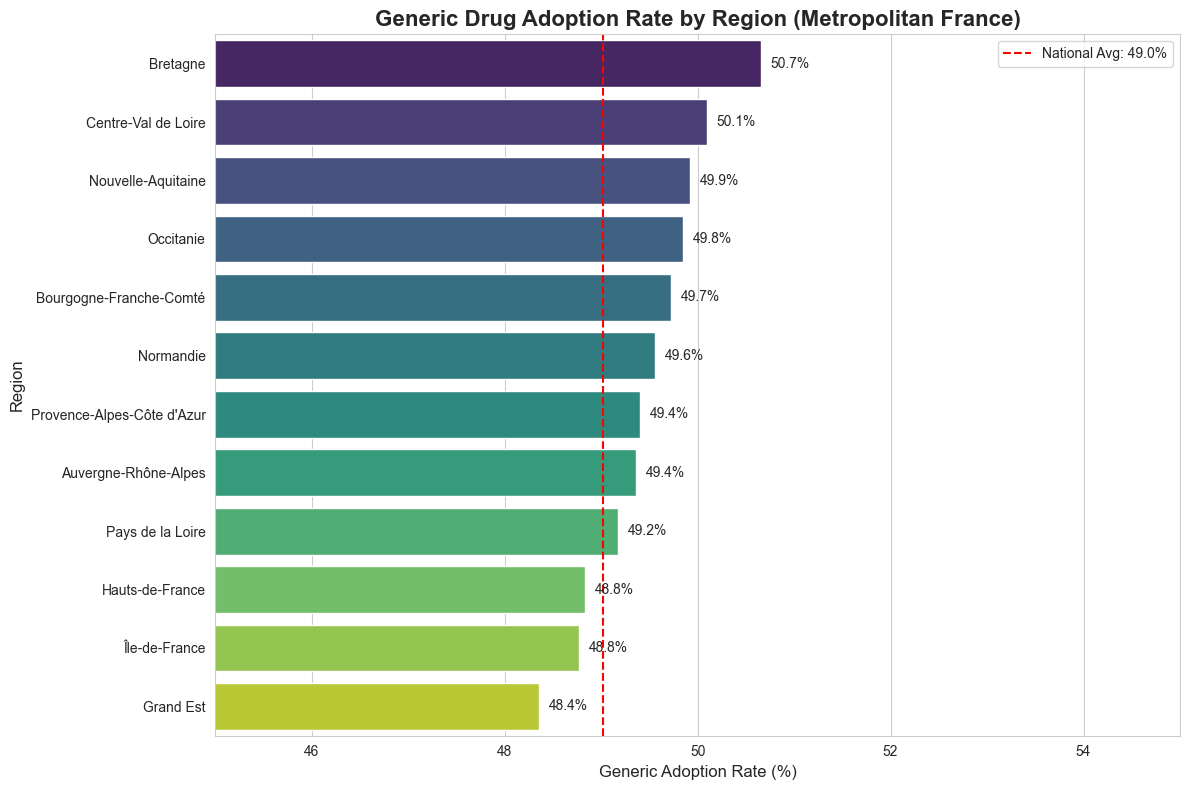

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create the figure
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# 2. Plot the data
# We use 'magma' or 'viridis' to highlight the ranking
ax = sns.barplot(
    x='Adoption_Rate', 
    y='Region_Name', 
    data=regional_metro, 
    palette='viridis'
)

# 3. Add a "National Average" vertical line
avg_rate = regional_metro['Adoption_Rate'].mean()
plt.axvline(avg_rate, color='red', linestyle='--', label=f'National Avg: {avg_rate:.1f}%')

# 4. Formatting
plt.title('Generic Drug Adoption Rate by Region (Metropolitan France)', fontsize=16, fontweight='bold')
plt.xlabel('Generic Adoption Rate (%)', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.xlim(45, 55) # Zooming in on the 45%-55% range to see the differences clearly
plt.legend()

# Add labels on the bars
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.1, p.get_y() + p.get_height()/2, f'{width:.1f}%', va='center')

plt.tight_layout()
plt.savefig('regional_adoption_ranking.png')
plt.show()

### 🔍 Analysis: Regional Homogeneity
The data reveals a surprisingly tight cluster of adoption rates, ranging from **48.4% (Grand Est)** to **50.7% (Bretagne)**. 

**Key Takeaways:**
* **Consistency:** The low variance (approx. 2.3%) suggests that national pharmaceutical policies are being implemented with high consistency across mainland France.
* **The "2% Lever":** While the gap appears small, in a multi-billion euro market, moving a region like *Île-de-France* (Paris) up by 2% to match *Bretagne* would result in millions of euros in public savings.
* **Next Steps:** We will now project these values onto a map to see if there are geographic clusters (e.g., North vs. South).

In [19]:
pip install folium

   ---------------------------------------- 0.0/113.4 kB ? eta -:--:--
   -------------- ------------------------ 41.0/113.4 kB 653.6 kB/s eta 0:00:01
   ---------------------------------------- 113.4/113.4 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/93.9 kB ? eta -:--:--
   ---------------------------------------- 93.9/93.9 kB 1.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import folium
import pandas as pd
import json
import requests

# 1. data (based on your rankings)
data = {
    'Region_Name': [
        'Bretagne', 'Centre-Val de Loire', 'Nouvelle-Aquitaine', 'Occitanie', 
        'Bourgogne-Franche-Comté', 'Normandie', "Provence-Alpes-Côte d'Azur", 
        'Auvergne-Rhône-Alpes', 'Pays de la Loire', 'Hauts-de-France', 
        'Île-de-France', 'Grand Est'
    ],
    'Adoption_Rate': [
        50.65, 50.09, 49.92, 49.84, 49.72, 49.56, 
        49.40, 49.35, 49.17, 48.83, 48.76, 48.35
    ]
}
df_map = pd.DataFrame(data)

# 2. Fetch the GeoJSON for French Regions
geojson_url = "https://raw.githubusercontent.com/gregoiredavid/france-geojson/master/regions.geojson"
response = requests.get(geojson_url)
geojson_data = response.json()

# 3. Initialize the map centered on France
m = folium.Map(location=[46.2276, 2.2137], zoom_start=6, tiles="cartodbpositron")

# 4. Create the Choropleth layer
folium.Choropleth(
    geo_data=geojson_data,
    name="choropleth",
    data=df_map,
    columns=["Region_Name", "Adoption_Rate"],
    key_on="feature.properties.nom", # This matches the name in the GeoJSON
    fill_color="YlGnBu",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Generic Adoption Rate (%)",
).add_to(m)

# 5. Save as HTML
m.save("Generic_Adoption_Map.html")
print("Map has been saved as 'Generic_Adoption_Map.html'. Open this file in your browser!")

Map has been saved as 'Generic_Adoption_Map.html'. Open this file in your browser!


In [ ]:
#create the base map as before
m = folium.Map(location=[46.2276, 2.2137], zoom_start=6, tiles="cartodbpositron")

#use GeoJson for better control over tooltips
choropleth = folium.Choropleth(
    geo_data=geojson_data,
    data=df_map,
    columns=["Region_Name", "Adoption_Rate"],
    key_on="feature.properties.nom",
    fill_color="YlGnBu",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Generic Adoption Rate (%)",
    highlight=True 
).add_to(m)

# Tooltip
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(
        fields=['nom'],
        aliases=['Region: '],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;")
    )
)

m.save("Interactive_Generic_Map.html")